# import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd

# import dataset

In [2]:
# import dataset
insurance_df = pd.read_csv('insurance.csv')

# make a copy of the original dataset
insurance = insurance_df.copy()

In [3]:
# initial look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# basic info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# basisc statistical details about the data
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
#  basic statistical details about categorical columns
insurance.describe(include='O').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [7]:
# list catagorical unique values
for col in insurance.select_dtypes(include='object'):
    print(f'{col} : {insurance[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


# data cleaning

In [8]:
# check for missing values
insurance.isnull().sum()

# at this point, no furthre cleaning is required as there are no missing values or duplicates

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data modeling

In [ ]:
# catagorical features interger encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in insurance.select_dtypes(include='object'):
    insurance[col] = le.fit_transform(insurance[col])

# feature scaling is done with integer encoding,not one hot encoding
# we don't need to scale the features as we will be using tree based models


In [13]:
# split the data into features and target
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [16]:
# split the data ito training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)


In [23]:
# train a Decision Tree Regressor model
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_split=20, min_samples_leaf=5, random_state=42)

In [24]:
# model fitting
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=20,
                      random_state=42)

# model prediction

In [25]:
# model predictions
y_pred = dt_reg.predict(X_test)

# model evaluation

In [28]:
# model evaluation using regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
expl_var = explained_variance_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Median Absolute Error: {medae}')
print(f'Explained Variance Score: {expl_var}')

# model evaluation using cross validation (R^2)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_reg, X, y, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Mean Cross-validated R^2 score: {np.mean(cv_scores)}')

# Note: classification metrics (accuracy/confusion/ classification report) are not applicable
# to continuous regression targets and will raise "ValueError: continuous is not supported".
# If you want classification-style evaluation, convert the continuous targets to discrete bins/classes first.
# Example: bin the charges into 3 classes (low/medium/high) and compute classification metrics:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
bins = np.quantile(y, [0, 0.33, 0.66, 1.0])
y_test_binned = np.digitize(y_test, bins) - 1  # classes 0,1,2
y_pred_binned = np.digitize(y_pred, bins) - 1
accuracy = accuracy_score(y_test_binned, y_pred_binned)
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)
class_report = classification_report(y_test_binned, y_pred_binned)
print('Binned classification metrics (3 classes):')
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')



Mean Absolute Error: 2665.4227988740245
Mean Squared Error: 20947806.182682294
Root Mean Squared Error: 4576.877339702507
R^2 Score: 0.8650693890932545
Median Absolute Error: 1617.785428386525
Explained Variance Score: 0.865618887911276
Cross-validated R^2 scores: [0.86873898 0.77721927 0.89097898 0.84239318 0.86660211]
Mean Cross-validated R^2 score: 0.8491865043480502
Binned classification metrics (3 classes):
Accuracy: 0.7873134328358209
Confusion Matrix:
[[73 31  0  0]
 [ 2 66 11  0]
 [ 4  8 72  0]
 [ 0  0  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       104
           1       0.63      0.84      0.72        79
           2       0.86      0.86      0.86        84
           3       0.00      0.00      0.00         1

    accuracy                           0.79       268
   macro avg       0.60      0.60      0.59       268
weighted avg       0.81      0.79      0.79       268



c:\Users\samib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\samib\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# feature importance

Feature Importances:
smoker      0.695341
bmi         0.179638
age         0.115373
children    0.006311
region      0.002429
sex         0.000908
dtype: float64


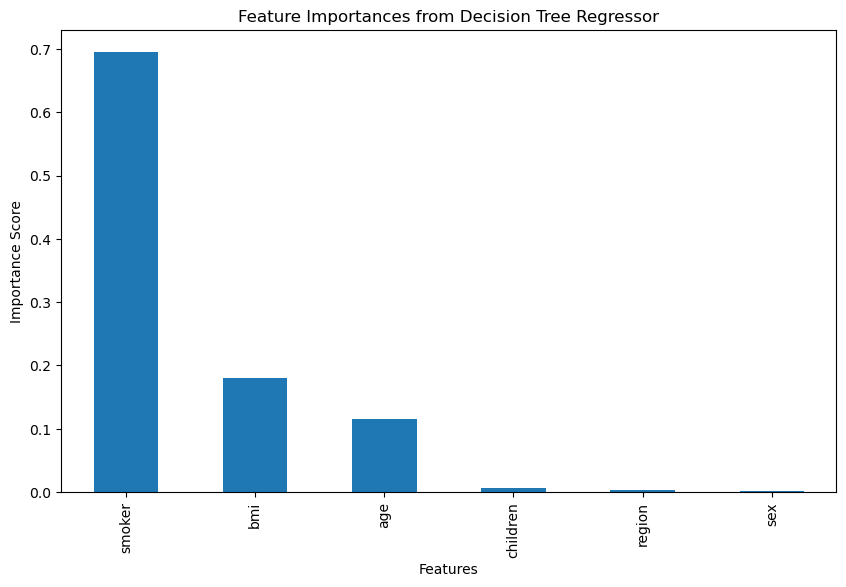

In [30]:
# feature importance
feature_importances = pd.Series(dt_reg.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importances:')
print(feature_importances)

#  plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances from Decision Tree Regressor')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


# visualize decision tree

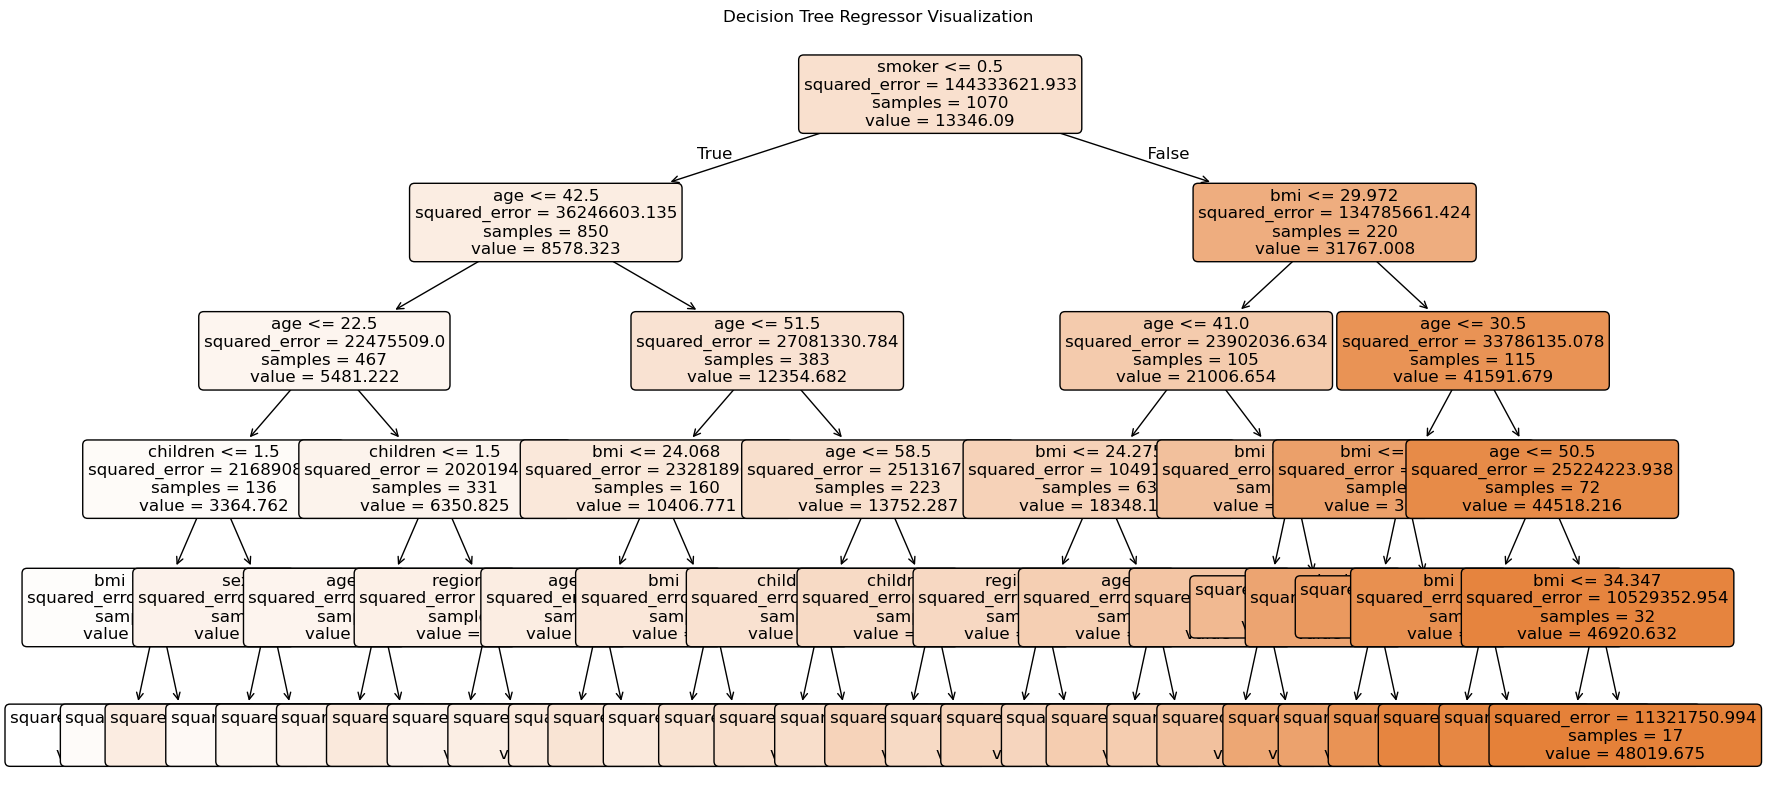

In [31]:
# visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title('Decision Tree Regressor Visualization')
plt.show()
